# Lab 2 - Exploring and manipulating data. 
Here is what we do in python 
1. Read in the data from a CSV file and do simple visualizations
2. Look for patterns in the data
3. Deal with missing values
4. Add in new features
5. Split and graph

In [11]:
# All imports should be at the top of the notebook
# This cell will be executed when the notebook is loaded

# Import the necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [12]:
# Define project directory
project_dir = r"C:\Users\balla\Projects\applied-ml-jballard"
data_file = os.path.join(project_dir, "data", "pollution_2000_2023.csv")

# Load dataset
df = pd.read_csv(data_file)

In [13]:
# Ensure 'Date' column exists and convert to datetime format
date_column = "Date"
df[date_column] = pd.to_datetime(df[date_column], errors="coerce")

# Filter for North Carolina
df = df[df["State"] == "North Carolina"]

# Define AQI columns to consolidate
aqi_columns = ["O3 AQI", "CO AQI", "SO2 AQI", "NO2 AQI"]

# Create consolidated AQI target (average of AQI values)
df["Consolidated_AQI"] = df[aqi_columns].mean(axis=1, skipna=True)


In [14]:
# Check missing values in target variable
missing_y = df["Consolidated_AQI"].isnull().sum()

# Handle missing values
if missing_y > 0:
    median_y = df["Consolidated_AQI"].median()
    df["Consolidated_AQI"].fillna(median_y, inplace=True)
    print(f" Filled {missing_y} missing values in 'Consolidated_AQI' with median: {median_y}")

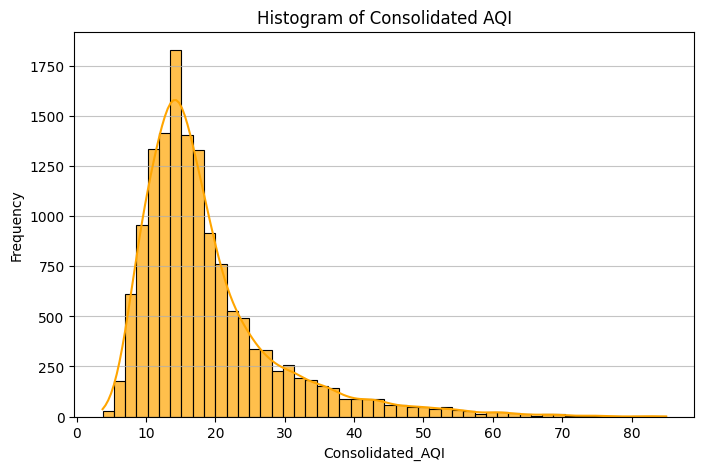

In [15]:
# Characterize consolidated AQI with histogram
# Target "y" variable
plt.figure(figsize=(8, 5))
sns.histplot(df["Consolidated_AQI"], bins=50, kde=True, color="orange", edgecolor="black", alpha=0.7)
plt.xlabel("Consolidated_AQI")
plt.ylabel("Frequency")
plt.title("Histogram of Consolidated AQI")
plt.grid(axis="y", alpha=0.75)




In [16]:
# Ensure output directory exists
output_dir = os.path.join(project_dir, "outputs")
os.makedirs(output_dir, exist_ok=True)

# Save histogram
histogram_y_path = os.path.join(output_dir, "consolidated_aqi_histogram.png")
plt.savefig(histogram_y_path)
plt.show()

<Figure size 640x480 with 0 Axes>

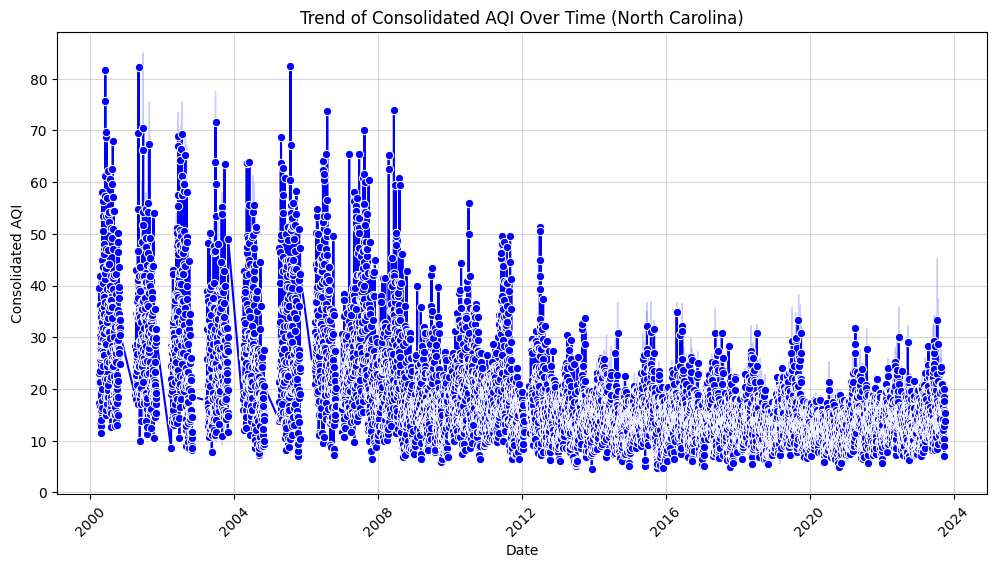

Target Variable (y): Consolidated AQI (Average of O3, CO, SO2, NO2 AQI)
Missing y Values: 0
Histogram saved at: C:\Users\balla\Projects\applied-ml-jballard\outputs\consolidated_aqi_histogram.png
Time-Series Plot saved at: C:\Users\balla\Projects\applied-ml-jballard\outputs\consolidated_aqi_time_series.png


In [17]:
# Independent Variable (x) Visualization: Date vs. AQI
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Date", y="Consolidated_AQI", marker="o", color="blue")
plt.xlabel("Date")
plt.ylabel("Consolidated AQI")
plt.title("Trend of Consolidated AQI Over Time (North Carolina)")
plt.xticks(rotation=45)
plt.grid(alpha=0.5)

# Save time-series plot
time_series_path = os.path.join(output_dir, "consolidated_aqi_time_series.png")
plt.savefig(time_series_path)
plt.show()

# Output results
print("Target Variable (y): Consolidated AQI (Average of O3, CO, SO2, NO2 AQI)")
print(f"Missing y Values: {missing_y}")
print(f"Histogram saved at: {histogram_y_path}")
print(f"Time-Series Plot saved at: {time_series_path}")

### Data Transformation
Explore rolling averages for consolidated AQI for North Carolina

#### Why might this transformation be helpful?

1. Air quality varies daily due to weather, traffic, and emissions, causing short-term fluctuations.

2. A rolling average smooths out short-term variations and highlights overall trends.

3. Helps detect seasonal or long-term pollution patterns in North Carolina

4. Useful for forecasting models to reduce noise and improve prediction accuracy.

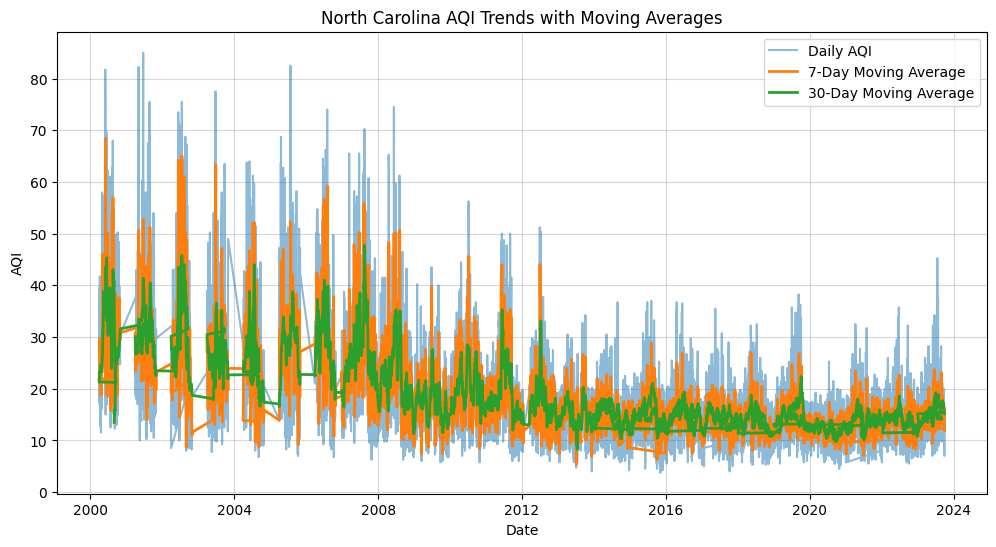

In [19]:
#Compute a 7-day rolling average for Consolidated_AQI:
df["AQI_7Day_MA"] = df["Consolidated_AQI"].rolling(window=7, min_periods=1).mean()

#Compute a 30-day rolling average for Consolidated_AQI:
df["AQI_30Day_MA"] = df["Consolidated_AQI"].rolling(window=30, min_periods=1).mean()

# Plot 7-day and 30-day moving averages
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["Consolidated_AQI"], label="Daily AQI", alpha=0.5)
plt.plot(df["Date"], df["AQI_7Day_MA"], label="7-Day Moving Average", linewidth=2)
plt.plot(df["Date"], df["AQI_30Day_MA"], label="30-Day Moving Average", linewidth=2)
plt.xlabel("Date")
plt.ylabel("AQI")
plt.title("North Carolina AQI Trends with Moving Averages")
plt.legend()
plt.grid(alpha=0.5)
plt.show()